In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"


import torch
torch.manual_seed(0)

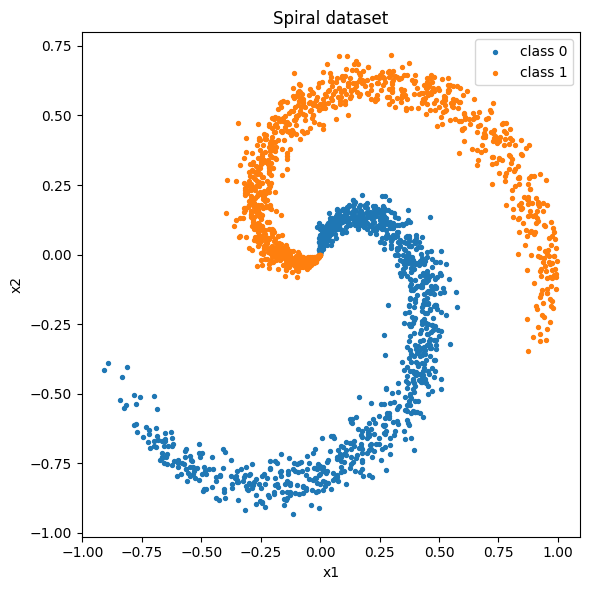

In [16]:

def make_spiral(n_points=1000, n_classes=2, noise=0.2):
    assert n_points % n_classes == 0
    points_per_class = n_points // n_classes
    
    X_list = []
    y_list = []
    for class_idx in range(n_classes):
        r = torch....(0.0, 1, points_per_class)
        t = torch....(class_idx * 4, (class_idx + 1) * 4, points_per_class)
        t = t + noise * torch.randn(points_per_class)
        
        x1 = r * torch....(t)
        x2 = r * torch....(t)
        X_class = torch.stack([x1, x2], dim=1)
        y_class = torch.full((points_per_class,), class_idx, dtype=torch.long)
        
        X_list.append(X_class)
        y_list.append(y_class)
    
    X = torch....(X_list, dim=0)
    y = torch....(y_list, dim=0)
    return X, y

X, y = make_spiral(n_points=2000, n_classes=2, noise=0.2)
X = X.to(device)
y = y.to(device)

plt.figure(figsize=(6, 6))

# Data points
X_cpu = X.cpu()
y_cpu = y.cpu()
for class_idx in range(2):
    mask = (y_cpu == class_idx)
    plt.scatter(
        X_cpu[mask, 0],
        X_cpu[mask, 1],
        s=8,
        label=f"class {class_idx}",
    )

plt.legend()
plt.title("Spiral dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.tight_layout()
plt.show()



In [ ]:
def rk4(f, h0, t0, t1, steps):
    ...
    return h

def euler(f, h0, t0, t1, steps):
    ...
    return h

In [ ]:

class NeuralProjectileODE(nn.Module):
    ...


# ---------------------------------------------------------
# Neural ODE model + classifier
# ---------------------------------------------------------
class NeuralODEClassifier(nn.Module):
    def __init__(self, dim, n_classes, t0=0.0, t1=1.0, steps=32):
        super().__init__()
        self.odefunc = ...(dim)
        # linear layer
        self.classifier = ...
        self.t0 = t0
        self.t1 = t1
        self.steps = steps

    def forward(self, x):
        h = ...(..., ..., ..., ..., self.steps)
        logits = ...(h)
        return logits

model = NeuralODEClassifier(dim=2, n_classes=2).to(device)

In [9]:
# guess which criterion? which optimizer?

criterion = ...
optimizer = ...

batch_size = 256
n_epochs = 120

for epoch in range(n_epochs):
    perm = torch.randperm(X.size(0))
    X_shuffled = X[perm]
    y_shuffled = y[perm]

    epoch_loss = 0.0
    for i in range(0, X.size(0), batch_size):
        xb = X_shuffled[i:i+batch_size]
        yb = y_shuffled[i:i+batch_size]

        logits = ...
        loss = ...

        # again...
        ...
        ...
        ...

        epoch_loss += loss.item() * xb.size(0)

    epoch_loss /= X.size(0)
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1}/{n_epochs} - loss: {epoch_loss:.4f}")



Epoch 5/120 - loss: 0.6615
Epoch 10/120 - loss: 0.5554
Epoch 15/120 - loss: 0.4402
Epoch 20/120 - loss: 0.4168
Epoch 25/120 - loss: 0.4036
Epoch 30/120 - loss: 0.3901
Epoch 35/120 - loss: 0.3737
Epoch 40/120 - loss: 0.3479
Epoch 45/120 - loss: 0.3103
Epoch 50/120 - loss: 0.2762
Epoch 55/120 - loss: 0.2529
Epoch 60/120 - loss: 0.2386
Epoch 65/120 - loss: 0.2259
Epoch 70/120 - loss: 0.2189
Epoch 75/120 - loss: 0.2156
Epoch 80/120 - loss: 0.2128
Epoch 85/120 - loss: 0.2067
Epoch 90/120 - loss: 0.2045
Epoch 95/120 - loss: 0.2019
Epoch 100/120 - loss: 0.2009
Epoch 105/120 - loss: 0.1991
Epoch 110/120 - loss: 0.1973
Epoch 115/120 - loss: 0.1950
Epoch 120/120 - loss: 0.1933


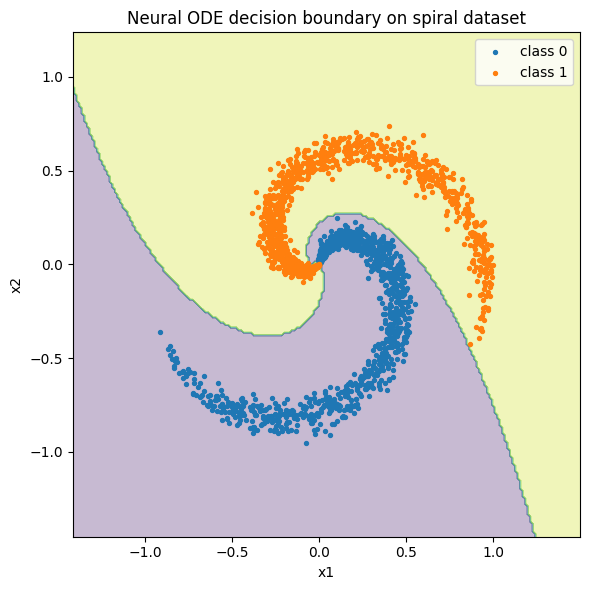

In [7]:

model.eval()
with torch.no_grad():
    x_min, x_max = X[:, 0].min().item() - 0.5, X[:, 0].max().item() + 0.5
    y_min, y_max = X[:, 1].min().item() - 0.5, X[:, 1].max().item() + 0.5

    xx, yy = torch.meshgrid(
        torch.linspace(x_min, x_max, 200),
        torch.linspace(y_min, y_max, 200),
        indexing="ij",
    )
    grid = torch.stack([xx.flatten(), yy.flatten()], dim=1).to(device)
    logits = model(grid)
    preds = torch.argmax(logits, dim=1).reshape(xx.shape).cpu()


plt.figure(figsize=(6, 6))
plt.contourf(xx.cpu(), yy.cpu(), preds, alpha=0.3)

X_cpu = X.cpu()
y_cpu = y.cpu()
for class_idx in range(2):
    mask = (y_cpu == class_idx)
    plt.scatter(
        X_cpu[mask, 0],
        X_cpu[mask, 1],
        s=8,
        label=f"class {class_idx}",
    )

plt.legend()
plt.title("Neural ODE decision boundary on spiral dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.tight_layout()
plt.show()
